In [1]:
import numpy as np
import matplotlib.pyplot as plt
from toolz.curried import pipe
from fmks.fext import makeio, makerandom, fmap, Random, map, compose, curry
from fmks.bases import primitive_basis
from fmks.localization import fit, predict, coeff_to_real
from typing import Tuple
import scipy.ndimage

In [2]:
def filter(x: np.ndarray) -> np.ndarray:
    return np.exp(-abs(x)) * np.cos(2 * np.pi * x)

In [3]:
@makeio
def fplot(x: np.ndarray, y: np.ndarray) -> None:
    plt.plot(x, y, color='#1a9850')
    plt.show()

io = pipe(
        np.linspace(-10.0, 10.0, 1000),
        lambda x: fplot(x, filter(x))
)

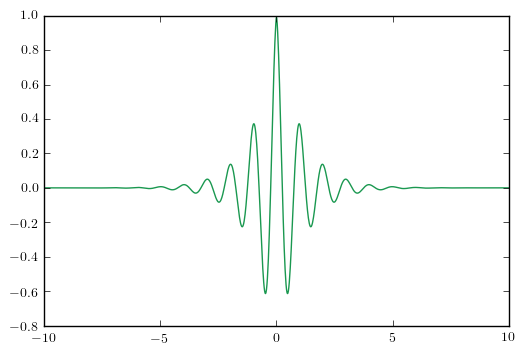

IO(None)

In [4]:
io

In [5]:
@makerandom
def get_x_data(n_sample: int, n_space: int) -> np.ndarray:
    np.random.seed(201)
    return np.random.random((n_sample, n_space))

In [6]:
@curry
def convolve(x_sample: np.ndarray) -> np.ndarray:
    return scipy.ndimage.convolve(x_sample,
                                  filter(np.linspace(-10.0, 10.0, len(x_sample))),
                                  mode="wrap")

In [7]:
get_y_data = compose(np.array, list, map(convolve))
get_xy_data = lambda x: (x, get_y_data(x))
    
data = fmap(get_xy_data, get_x_data(50, 101))

In [8]:
def fit_predict(x_data, y_data):
    basis = primitive_basis(n_state=2)
    return pipe(
        fit(x_data, y_data, basis),
        lambda coeff: (predict(x_data, coeff, basis), coeff)
    )

x, y = data._action()
y_pred, coeff = fit_predict(x, y)
print(y_pred[0, :4])
print(y[0, :4])
print(coeff.shape)

[-0.41059557  0.20004566  0.61200171  0.5878077 ]
[-0.41059557  0.20004566  0.61200171  0.5878077 ]
(51, 2)


(101,)
(101, 2)


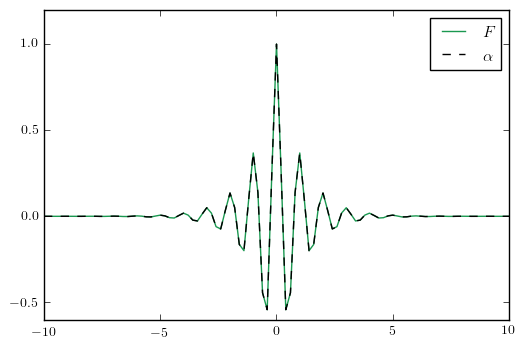

In [9]:
x = np.linspace(-10.0, 10.0, 101)
rcoeff = coeff_to_real(coeff, (101,))
print(x.shape)
print(rcoeff.shape)
plt.plot(x, filter(x), label=r'$F$', color='#1a9850')
plt.plot(x, -rcoeff[:, 0] + rcoeff[:, 1], 
         'k--', label=r'$\alpha$')
l = plt.legend()
plt.show()

In [10]:


print(y_pred[0, :4])

[-0.41059557  0.20004566  0.61200171  0.5878077 ]
